# Exploration of _E.coli_ 's metabolic modes.

## Load required pakages and scripts

In [26]:
library(ggplot2)
library(PEIP)
library(scales)
library(stringr)
library(truncnorm)

source('hyperflux_data.R')

options(repr.plot.width=5)

## Load samples

In [7]:
root.dir <- 'U:/data/directions_prediction'

# Load samples for all reaction fluxes.
flux.samples.df <- load.tfs.flux.samples(root.dir) %>%
    filter(Condition == "glc")
drg.samples.df <- load.tfs.drg.samples(root.dir) %>%
    filter(Condition == "glc")
drg0.samples.df <- load.tfs.drg0.samples(root.dir) %>%
    filter(Condition == "glc")
corr.samples.df <- load.tfs.corr.samples(root.dir) %>%
    filter(Condition == "glc")
conc.samples.df <- load.tfs.conc.samples(root.dir) %>%
    filter(Condition == "glc")

## Plot reactions showing thermodynamic multimodality

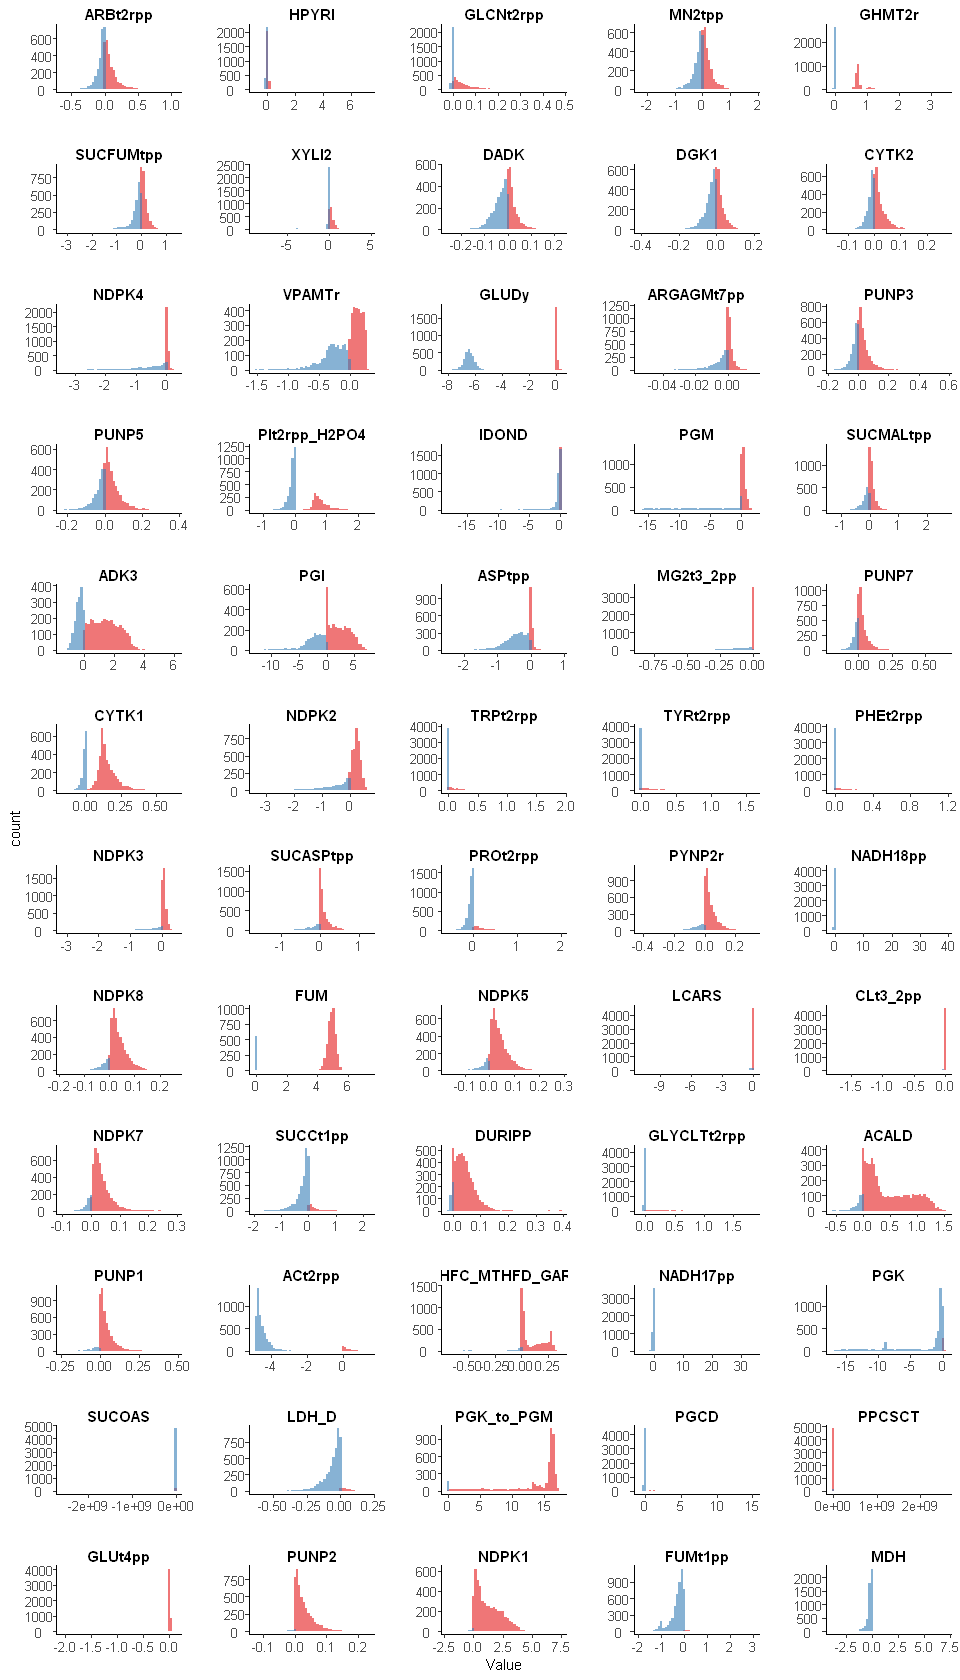

In [14]:
options(repr.plot.width=8, repr.plot.height = 14)
multimodal.fluxes.df <- find.modes(flux.samples.df, 60)
multimodal.fluxes.df <- multimodal.fluxes.df %>%
    mutate(ClusterID = rep(1, nrow(multimodal.fluxes.df)))
multimodal.fluxes.df$ClusterID[multimodal.fluxes.df$Value < 0] = 2

ggplot(multimodal.fluxes.df, aes(x = Value, fill = as.factor(ClusterID))) +
    geom_histogram(alpha = .6, position = position_identity(), bins = 50) + 
    scale_fill_brewer(palette="Set1") + 
    scale_colour_brewer(palette="Set1") +
    facet_wrap(~Reaction, ncol = 5, scales = "free") + 
    paper.theme()

## PGI

### Find reactions influenced by the mode of PGI

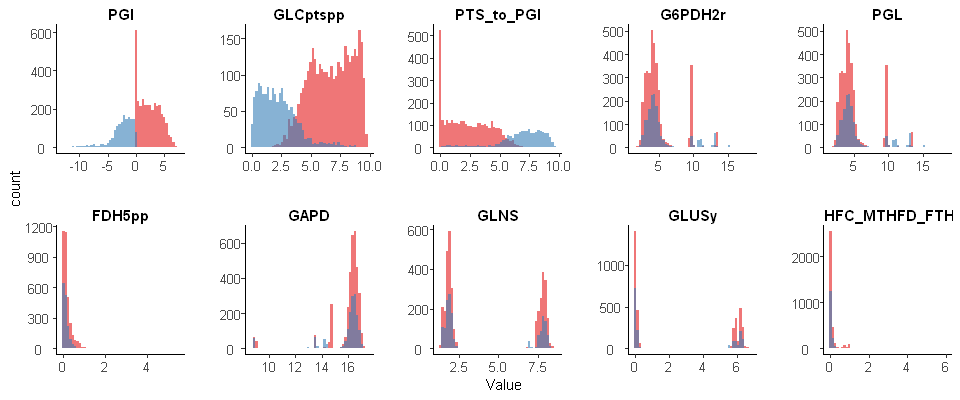

In [19]:
plot.affected.variables(flux.samples.df, flux.samples.df, 'PGI', num.vars = 10, is.metabolite = FALSE)

### Find concentrations influencing the mode of PGI

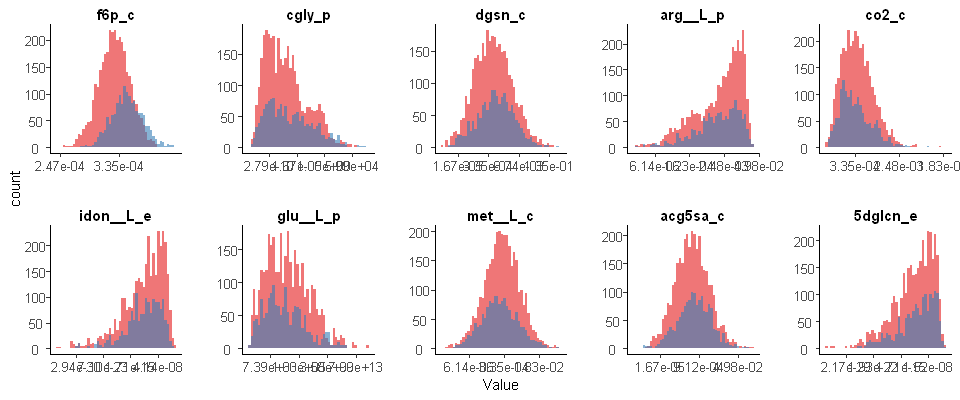

In [20]:
plot.affected.variables(flux.samples.df, conc.samples.df, 'PGI', num.vars = 10, is.metabolite = TRUE)

## FUM

### Find reactions influenced by the mode of FUM

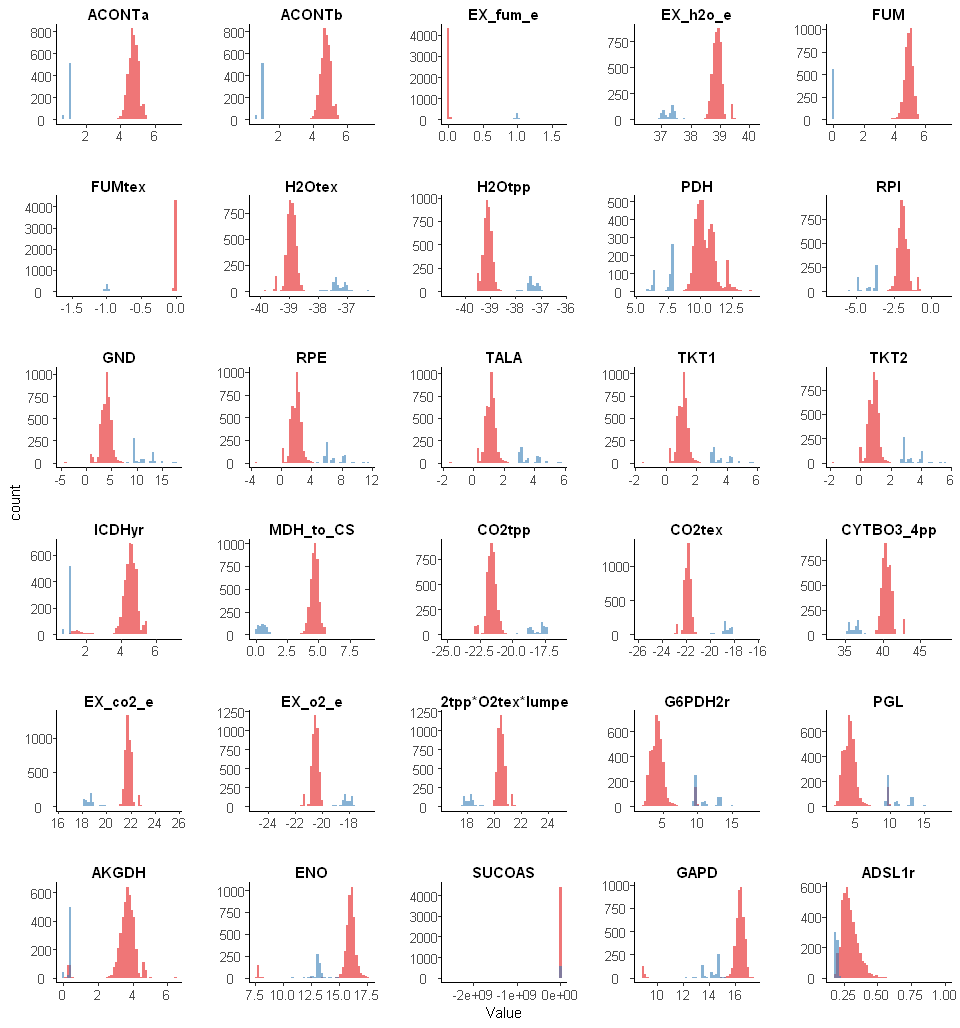

In [28]:
plot.affected.variables(flux.samples.df, flux.samples.df, 'FUM', num.vars = 30, is.metabolite = FALSE)

### Find concentrations affecting the direction of FUM

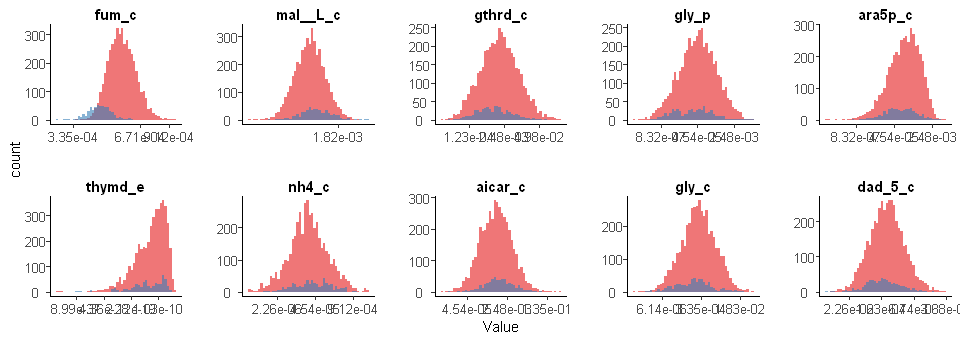

In [29]:
plot.affected.variables(flux.samples.df, conc.samples.df, 'FUM', num.vars = 10, is.metabolite = TRUE)

## GHMT2r

### Find reactions influenced by the mode of GHMT2r

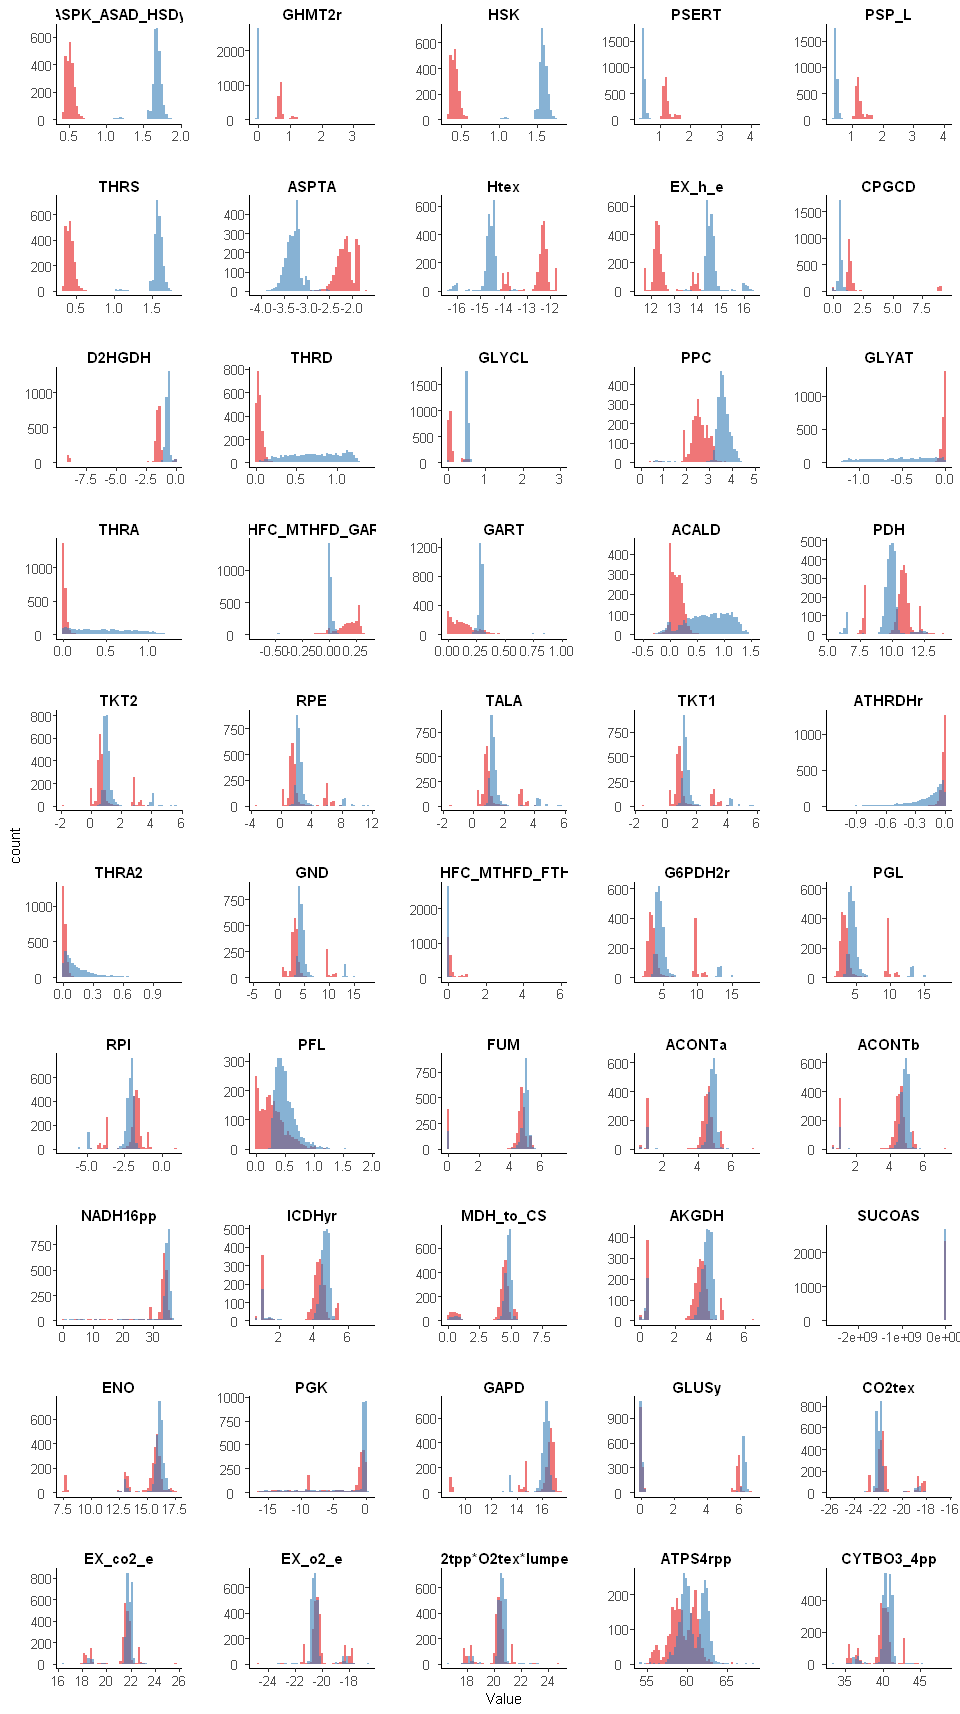

In [36]:
plot.affected.variables(flux.samples.df, flux.samples.df, 'GHMT2r', num.vars = 50, is.metabolite = FALSE)

### Find concentrations affecting the direction of GHMT2r

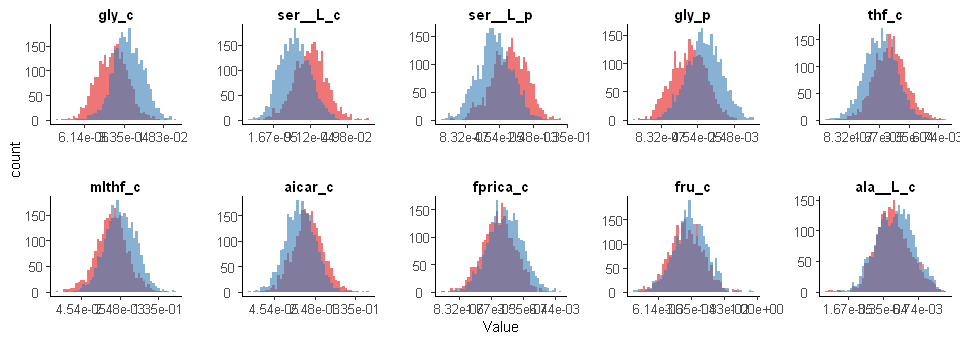

In [32]:
plot.affected.variables(flux.samples.df, conc.samples.df, 'GHMT2r', num.vars = 10, is.metabolite = TRUE)

### Find correction terms affecting the direction of GHMT2r

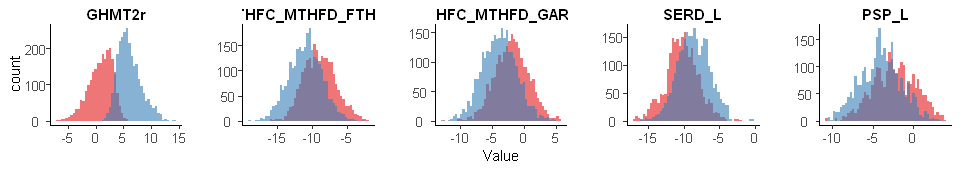

In [34]:
plot.affected.variables(flux.samples.df, corr.samples.df, 'GHMT2r', num.vars = 5, is.metabolite = FALSE)

### Find standard reaction energies affecting the direction of GHMT2r

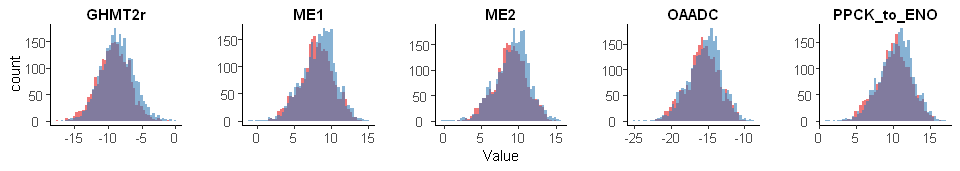

In [35]:
plot.affected.variables(flux.samples.df, drg0.samples.df, 'GHMT2r', num.vars = 5, is.metabolite = FALSE)

## GLUDy

### Find reactions influenced by the mode of GLUDy

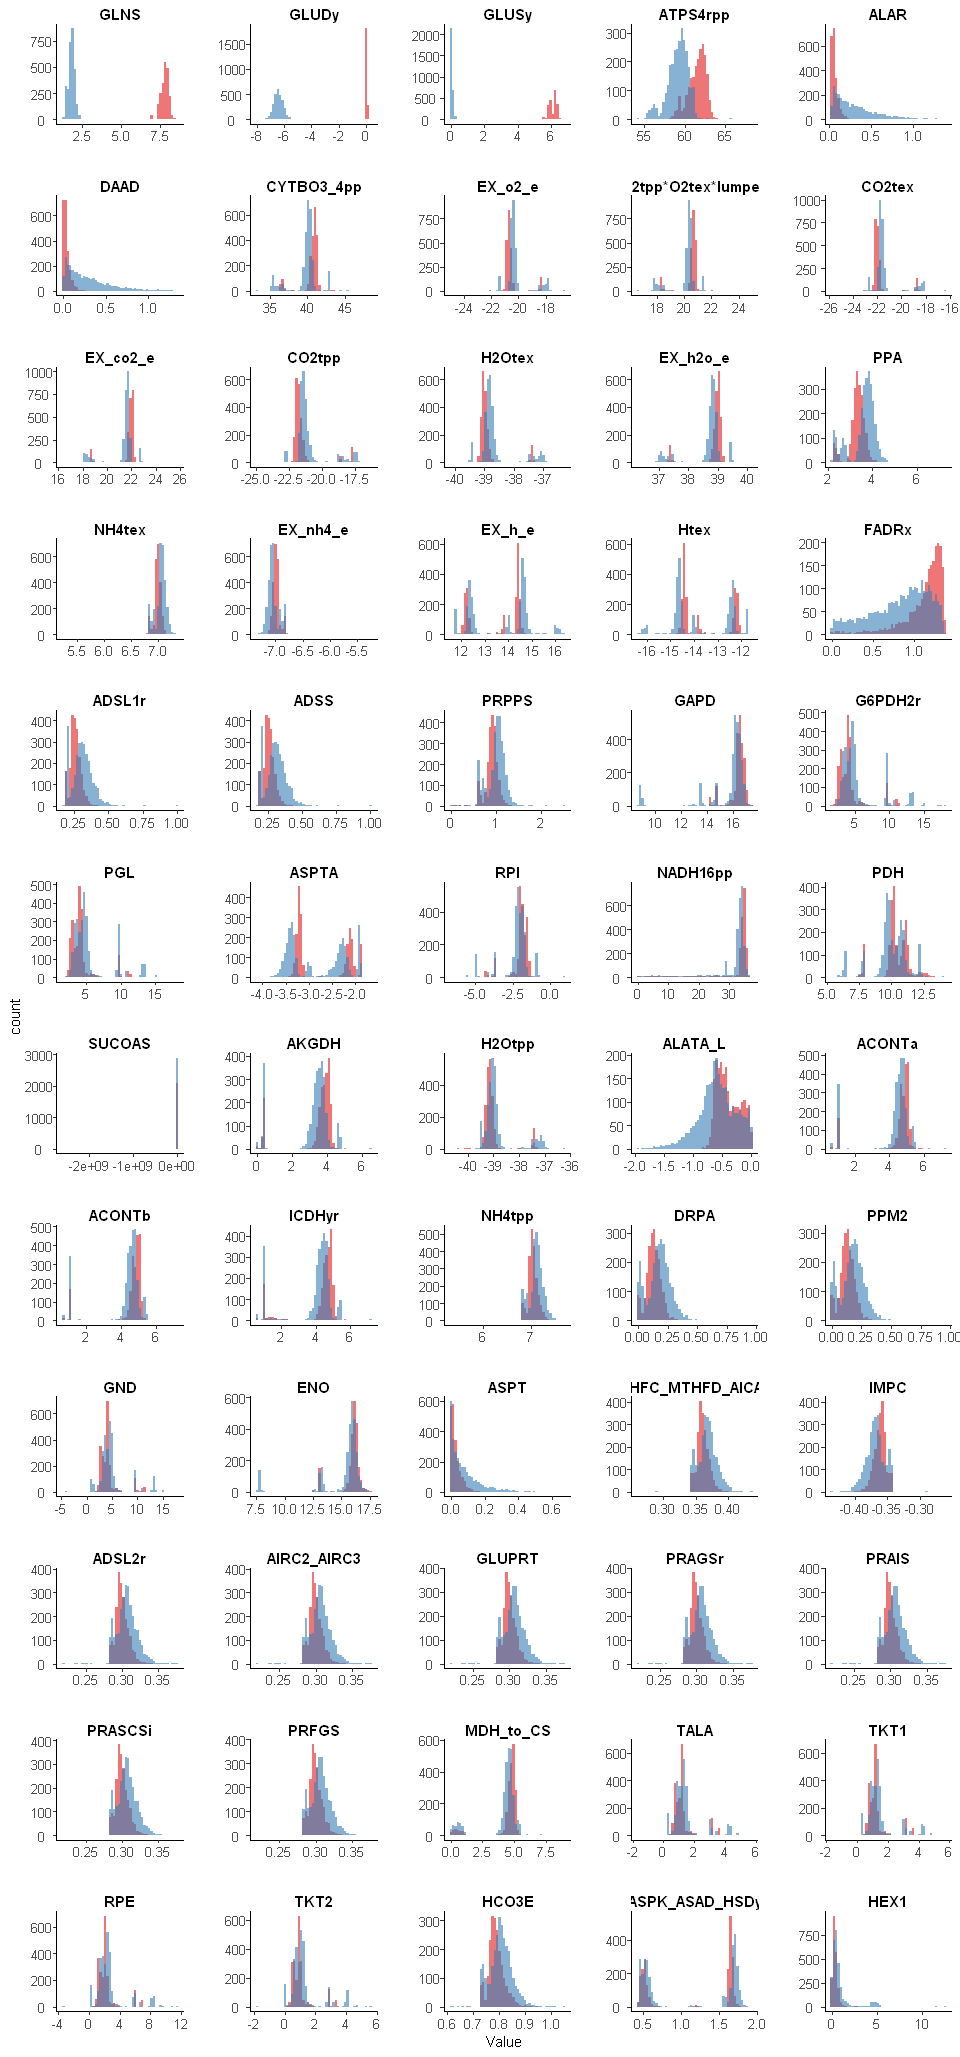

In [37]:
plot.affected.variables(flux.samples.df, flux.samples.df, 'GLUDy', num.vars = 60, is.metabolite = FALSE)

### Find concentrations influencing the mode of GLUDy

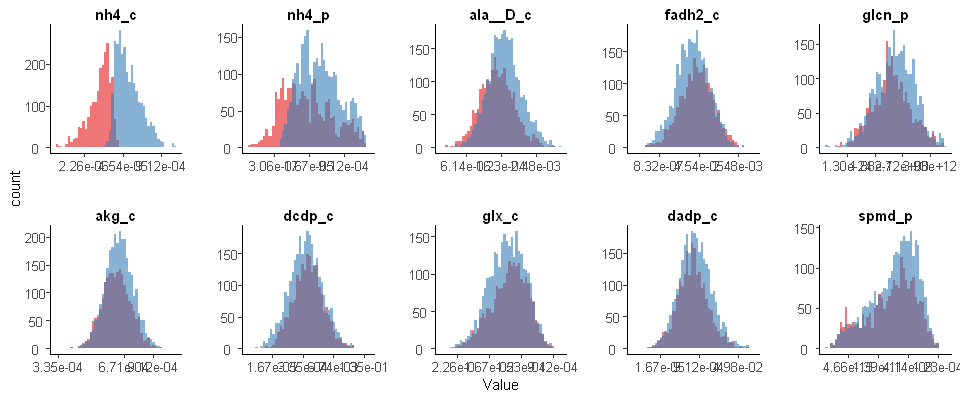

In [23]:
plot.affected.variables(flux.samples.df, conc.samples.df, 'GLUDy', num.vars = 10, is.metabolite = TRUE)

## VPAMTr

### Find reactions influenced by the mode

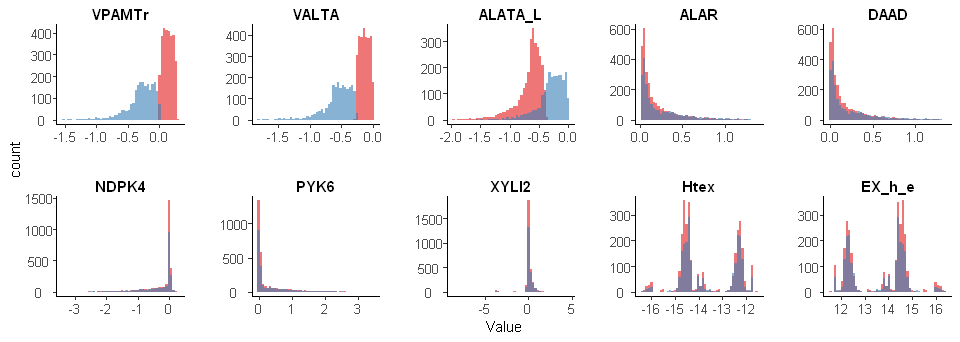

In [38]:
plot.affected.variables(flux.samples.df, flux.samples.df, 'VPAMTr', num.vars = 10, is.metabolite = FALSE)

### Find concentrations influencing the mode

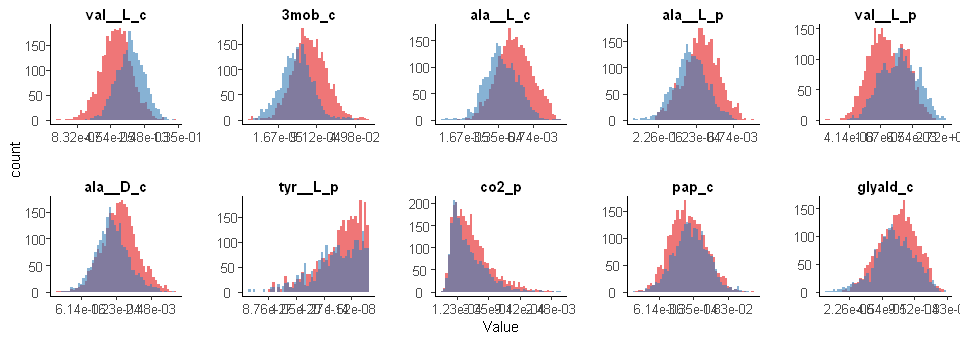

In [39]:
plot.affected.variables(flux.samples.df, conc.samples.df, 'VPAMTr', num.vars = 10, is.metabolite = TRUE)

## CYTK1

### Find reactions influenced by the mode

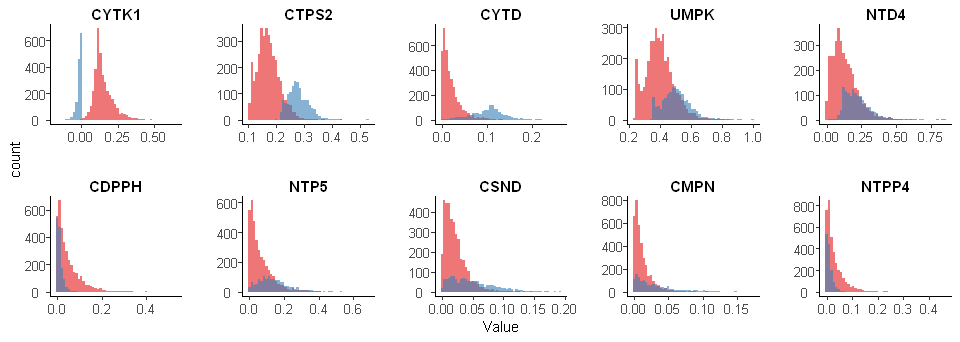

In [40]:
plot.affected.variables(flux.samples.df, flux.samples.df, 'CYTK1', num.vars = 10, is.metabolite = FALSE)

### Find concentrations influencing the mode

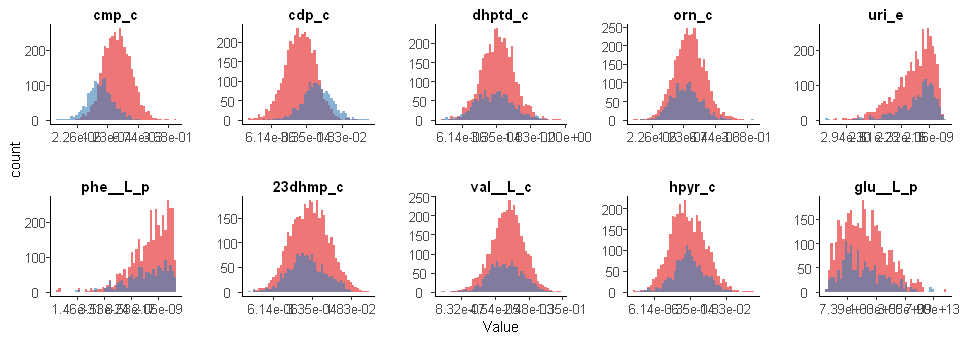

In [41]:
plot.affected.variables(flux.samples.df, conc.samples.df, 'CYTK1', num.vars = 10, is.metabolite = TRUE)